<a href="https://colab.research.google.com/github/Jomana-ElSaghier/Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install & Import Libraries**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **Load the Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Explore the Data**

In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# **Select Features for Clustering**

In [8]:
features=['Annual Income (k$)','Spending Score (1-100)']
x=df[features]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#**Scale the Data**

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#**Find Best Number of Clusters (Elbow + Silhouette)**

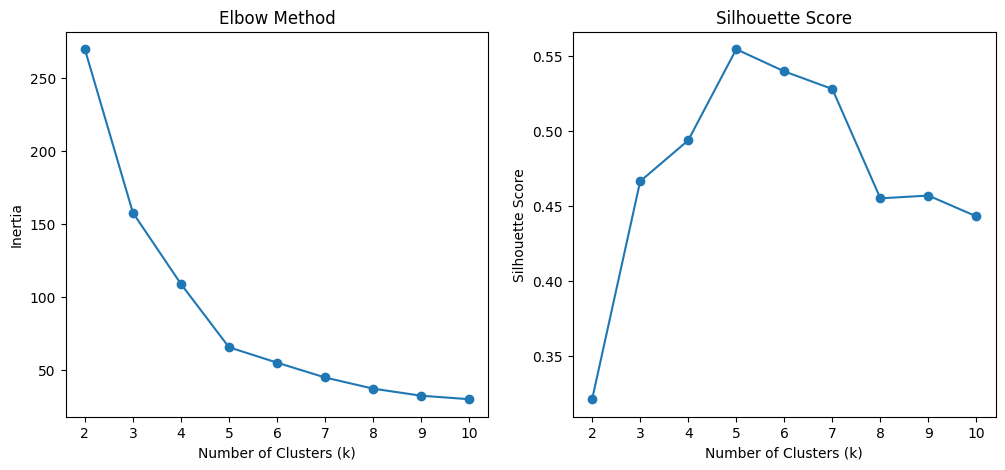

Best k by silhouettes score: 5


In [15]:
inertias=[]
silhouettes=[]
K=range(2,11)
for k in K:
  kmeans= KMeans(n_clusters=k,n_init=10,random_state=42)
  labels= kmeans.fit_predict(x_scaled)
  inertias.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(x_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K,inertias,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K,silhouettes,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()
best_k=K[silhouettes.index(max(silhouettes))]
print("Best k by silhouettes score:",best_k)


#**Apply K-Means with Best k**

In [16]:
kmeans=KMeans(n_clusters=best_k,n_init=10,random_state=42)
df['Cluster']=kmeans.fit_predict(x_scaled)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


#**Visualize Clusters**

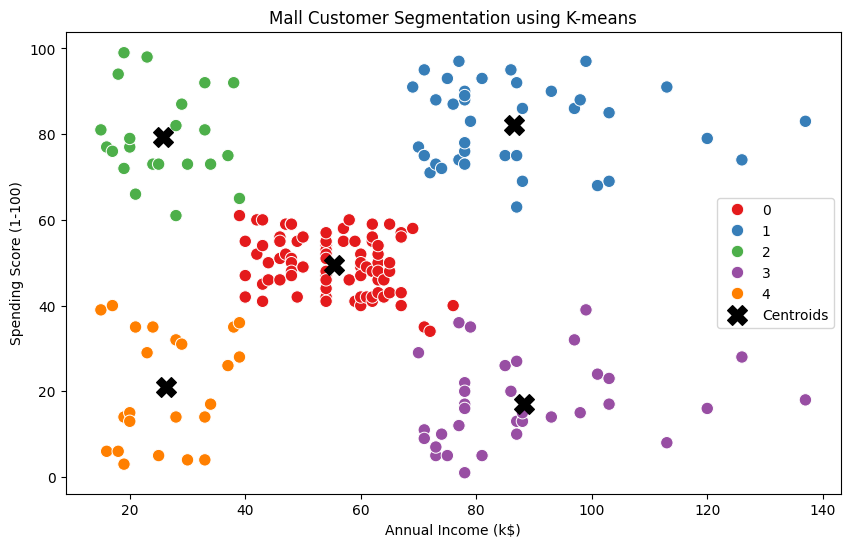

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df[features[0]],y=df[features[1]],hue=df['Cluster'],palette='Set1',s=80)
plt.scatter(kmeans.cluster_centers_[:,0] * scaler.scale_[0] + scaler.mean_[0]
            ,kmeans.cluster_centers_[:,1] * scaler.scale_[1] + scaler.mean_[1]
            ,marker='X',s=200,c='black',label='Centroids')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.title('Mall Customer Segmentation using K-means')
plt.show()

#**Summarize Clusters**

In [23]:
cluster_summary= df.groupby('Cluster')[features].mean().round(2)
cluster_summary['count']=df['Cluster'].value_counts().sort_index()
cluster_summary

,Annual Income (k$),Spending Score (1-100),count
Cluster,,,
0,55.30,49.52,81
1,86.54,82.13,39
2,25.73,79.36,22
3,88.20,17.11,35
4,26.30,20.91,23


#**Analyze Average Spending per Cluster**

In [24]:
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean().round(2).sort_values(ascending=False)
avg_spending

,Spending Score (1-100)
Cluster,
1,82.13
2,79.36
0,49.52
4,20.91
3,17.11


#**DBSCAN**

In [26]:
db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(x_scaled)
df['DBSCAN_Cluster'] = labels

print("DBSCAN Clusters:", np.unique(labels))
df['DBSCAN_Cluster'].value_counts()

DBSCAN Clusters: [-1  0]


,count
DBSCAN_Cluster,
0,195
-1,5


#**Visualize DBSCAN Results**

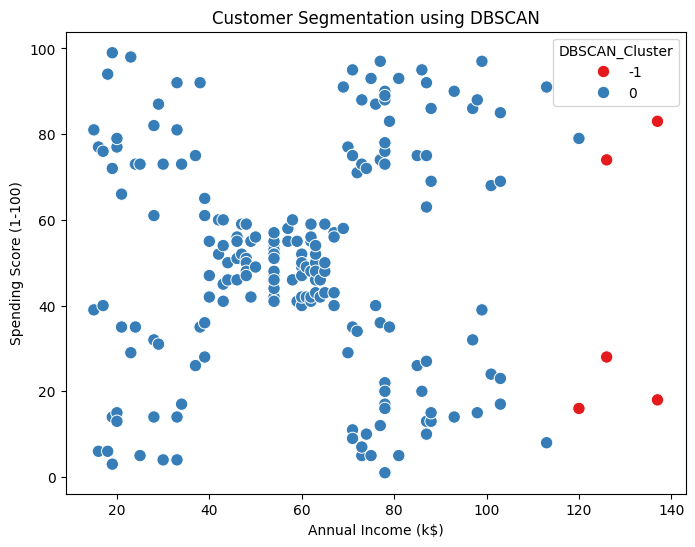

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['DBSCAN_Cluster'], palette="Set1", s=80)
plt.title("Customer Segmentation using DBSCAN")
plt.show()

In [29]:
df.to_csv("Mall_Customers_with_Clusters.csv", index=False)
